In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("C:/Users/SANA SHAIKH/Downloads/raw_sales.csv.zip")

In [9]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [15]:
df.columns

Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms'], dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [21]:
df.shape

(29580, 5)

In [23]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


Text(0.5, 1.0, 'House price prediction')

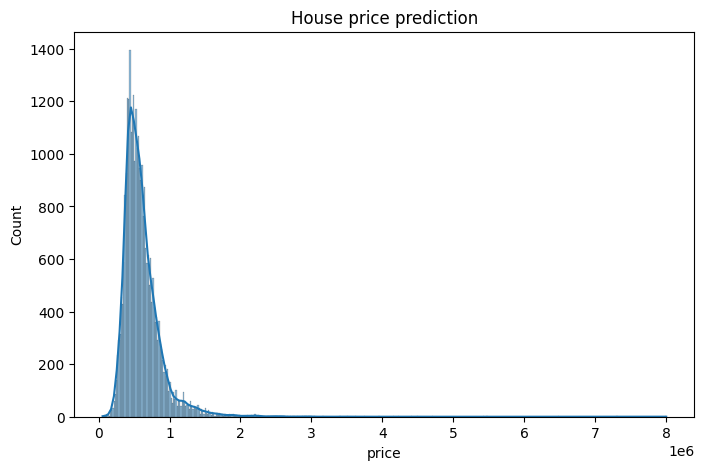

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'],kde=True)
plt.title("House price prediction")

Text(0.5, 1.0, 'Price based on Bedrooms')

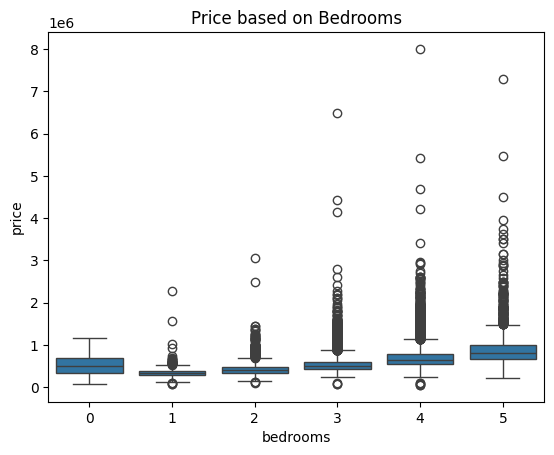

In [27]:
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title("Price based on Bedrooms")


Text(0.5, 1.0, 'Price by Property Type')

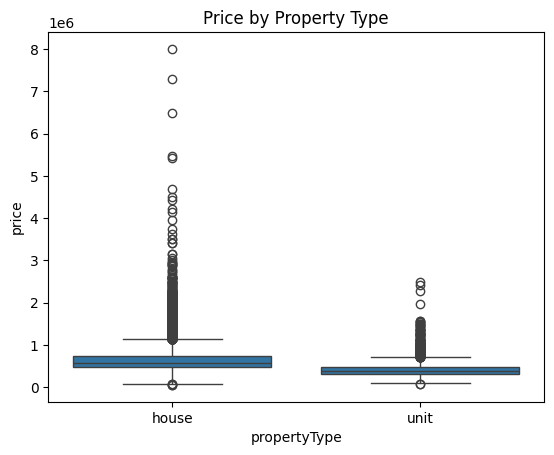

In [29]:
sns.boxplot(x='propertyType', y='price', data=df)
plt.title("Price by Property Type")


Text(0.5, 1.0, 'House Price Over Years')

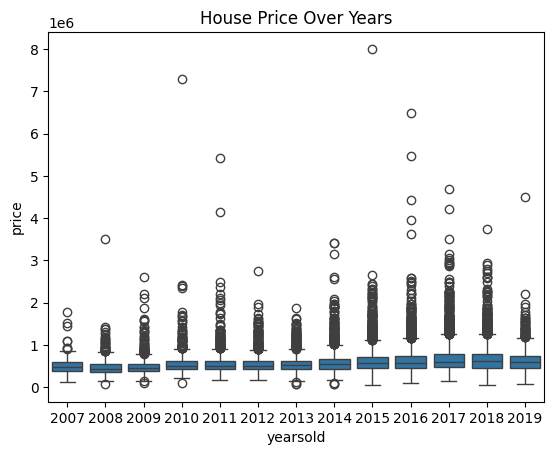

In [35]:
df['datesold'] = pd.to_datetime(df['datesold'])
df['yearsold'] = df['datesold'].dt.year

sns.boxplot(x='yearsold', y='price', data=df)
plt.title("House Price Over Years")


In [39]:
df['log_price']=np.log1p(df['price'])

<Axes: xlabel='log_price', ylabel='Count'>

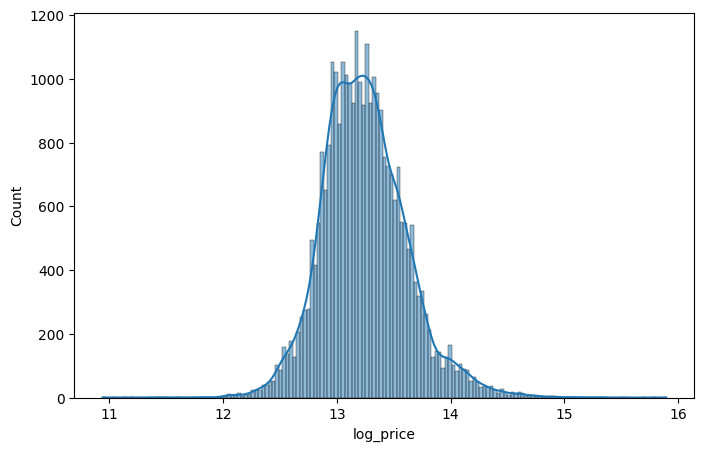

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df['log_price'],kde=True)

In [45]:
pd.get_dummies(df['propertyType'], drop_first=True)


,unit
0,False
1,False
2,False
3,False
4,False
...,...
29575,True
29576,True
29577,True
29578,True


In [47]:
df.head()

,datesold,postcode,price,propertyType,bedrooms,yearsold,log_price
0,2007-02-07,2607,525000,house,4,2007,13.171155
1,2007-02-27,2906,290000,house,3,2007,12.577640
2,2007-03-07,2905,328000,house,3,2007,12.700772
3,2007-03-09,2905,380000,house,4,2007,12.847929
4,2007-03-21,2906,310000,house,3,2007,12.644331


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
 5   yearsold      29580 non-null  int32         
 6   log_price     29580 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(1)
memory usage: 1.5+ MB


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
X = df[['yearsold', 'propertyType', 'bedrooms', 'postcode']]
y = df['log_price']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
categorical_cols = ['propertyType', 'postcode']

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  
)

In [63]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [65]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['propertyType',
                                                   'postcode'])])),
                ('regressor', LinearRegression())])

In [67]:
y_pred_log = model.predict(X_test)
y_pred_price = np.expm1(y_pred_log)  


In [69]:
y_test_price = np.expm1(y_test)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2 = r2_score(y_test_price, y_pred_price)

print(f"RMSE: ₹{rmse:,.2f}")
print(f"R² Score: {r2:.3f}")

RMSE: ₹151,237.28
R² Score: 0.662


In [71]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
from sklearn.ensemble import RandomForestRegressor


model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [75]:
model_rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['propertyType',
                                                   'postcode'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [77]:
y_pred_log_rf = model_rf.predict(X_test)
y_pred_price_rf = np.expm1(y_pred_log_rf)
y_test_price = np.expm1(y_test)


In [79]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_rf = np.sqrt(mean_squared_error(y_test_price, y_pred_price_rf))
r2_rf = r2_score(y_test_price, y_pred_price_rf)

print(f"Random Forest RMSE: ₹{rmse_rf:,.2f}")
print(f"Random Forest R² Score: {r2_rf:.3f}")


Random Forest RMSE: ₹141,851.55
Random Forest R² Score: 0.702


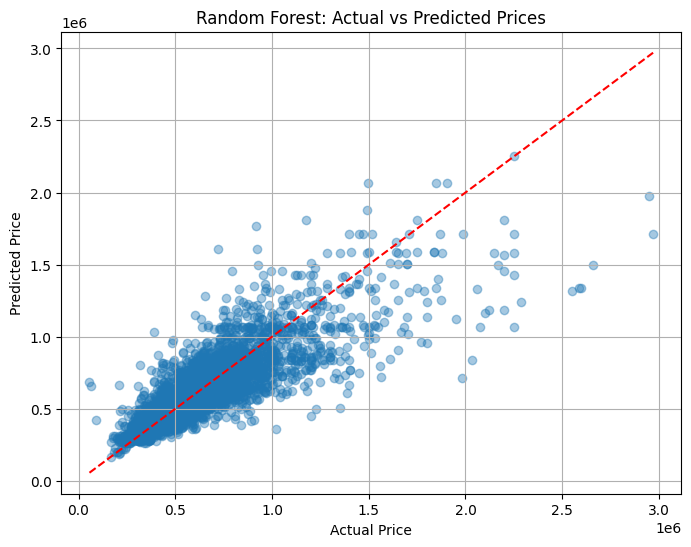

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test_price, y_pred_price_rf, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.plot([y_test_price.min(), y_test_price.max()],
         [y_test_price.min(), y_test_price.max()], 'r--')
plt.grid(True)
plt.show()
